### Running shell commands from inside the notebook
To forward a command to the underlying shell of the computer prefix it with '!'.

In [1]:
#Windows, Mac OS and Linux, Google Colab
!echo Hello world

Hello world


In case that you are missing some packages, they can easily be installed in the virtual environment you created.  
You just need to follow these steps:  
1. make sure you sourced/activated your virtual environment
    * Windows: `C:\Users\<USER>\envs\ml_env\Scripts\activate` (or `~/envs/ml_env/bin/Activate.ps1` if you use Powershell)
    * Mac/Linux: `. ~/envs/ml_env/bin/activate`
2. run your desired command e.g. `pip install <PACKAGE_NAME>`
    
Let's try to upgrade pip - the Python package manager.

In [2]:
!pip install --upgrade pip

# PyTorch Tutorial 

Facebook's PyTorch engine has a unique way of solving problems, allowing us to solve machine learning problems very efficiently. Nowadays, machine learning is used in almost all areas of life and work, with famous applications in computer vision, speech recognition, language translations, healthcare, and many more.

Production-oriented and capable of handling different computational architectures (CPUs and GPUs), PyTorch is a framework for any kind of computation that requires high performance and easy distribution. It excels at deep learning, making it possible to create everything from shallow networks (neural networks made of a few layers) to complex deep networks for image recognition and natural language processing.

In this semseter, we will use PyTorch to implement different machine learning algorithms 

* **Feed Forward Neural Networks (FFNNs)** classification and regression based on features.
* **Convolutional Neural Networks (CNNs)** image classification, object detection, video action recognition, etc.
* **Generative Adversarial Networks (GANs)**  unsupervised generation of realistic images, etc.
* **Deep Reinforcement Learning** game playing, robotics in simulation, self-play, neural architecture search, etc.

## Installing PyTorch
To install PyTorch on your local machine, you can use pip - the python package manager.
```console
!pip install torch torchvision torchaudio
```

If you have a Nvidia GPU, then you can install the CUDA-supported version:
```console
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
```

More detailed instructions can be found on the [PyTorch Website](https://pytorch.org/get-started/locally/).

## Importing PyTorch
The first step is going to be to import PyTorch.

In [3]:
import torch

Other required packages for this notebook will be imported later when they are needed.


## PyTorch
PyTorch does have its own data structure for the purpose of performance and ease of use, namely the `torch.Tensor`. You can think of a PyTorch tensor as an n-dimensional array or list.

**Example**: The shape of a tensor can be described with a vector $[ 10000, 3, 32, 32]$
* 10,000 images
* Each image has 3 channels (RGB)
* Each channel has 32 rows
* Each row has 32 pixels

### Creation

Tensors can be created in the following ways:

**1)** directly from data

In [4]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


**2)** from a NumPy array

In [5]:
import numpy as np

np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


**3)** with random or constant values

In [6]:
rand_tensor = torch.rand(2,3) # random numbers in [0,1]
ones_tensor = torch.ones(2,3)
zeros_tensor = torch.zeros(2,3)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2181, 0.1424, 0.2210],
        [0.7839, 0.8441, 0.3092]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


**4)** from other tensors

In [7]:
r_tensor = torch.rand_like(rand_tensor) # random numbers in [0,1]
o_tensor = torch.ones_like(rand_tensor)
z_tensor = torch.zeros_like(rand_tensor)

print(f"Random Tensor: \n {r_tensor} \n")
print(f"Ones Tensor: \n {o_tensor} \n")
print(f"Zeros Tensor: \n {z_tensor}")

Random Tensor: 
 tensor([[0.0585, 0.7429, 0.2790],
        [0.6340, 0.5882, 0.2914]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Attributes of Tensors

Each tensor has a data type, a shape, and a device on which it is stored:  
* **Data Type**: `torch.bool`, `torch.uint8`, `torch.int32`, `torch.int64`, `torch.float32`, `torch.float64` and others.
* **Shape**: Represents the dimension of  the data.
* **Device**: By default, tensors are created on the CPU. But they can also be created on / moved to the GPU.

In [8]:
data = [[1, 2],[3, 4]]
default_tensor = torch.tensor(data)
print(default_tensor)
print(f"Type: {default_tensor.dtype}")
print(f"Shape: {default_tensor.shape}")
print(f"Device: {default_tensor.device}")

tensor([[1, 2],
        [3, 4]])
Type: torch.int64
Shape: torch.Size([2, 2])
Device: cpu


You can also specify the data type during the creation.

In [9]:
float_tensor = torch.tensor(data, dtype=torch.float32)
print(float_tensor)
print(f"Type: {float_tensor.dtype}")
print(f"Shape: {float_tensor.shape}")

tensor([[1., 2.],
        [3., 4.]])
Type: torch.float32
Shape: torch.Size([2, 2])


If you have a GPU with CUDA support, you should use it for a better runtime in your trainings. Let's determine whether a supported GPU is present:

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


By default, tensors are created on the CPU. But now, we can also create tensors on our preferred device. It is also possible to move existing tensors to other devices.

In [11]:
cpu_tensor = torch.Tensor(data)
device_tensor = torch.ones(2, 3, device=device)
moved_tensor = cpu_tensor.to(device)

print(f"cpu_tensor device: {cpu_tensor.device}")
print(f"device_tensor device: {device_tensor.device}")
print(f"moved_tensor device: {moved_tensor.device}")

cpu_tensor device: cpu
device_tensor device: cuda:0
moved_tensor device: cuda:0


### Operations on Tensors

Just like vectors and matrices, tensors can have operations applied to them like addition, subtraction, dot product, cross product etc.

In [12]:
t1 = torch.Tensor([[1,2,3],[4,5,6]])
t2 = torch.Tensor([[3,3,3],[3,3,3]])

print(t1)
print(t2)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])


In [13]:
# This computes the element-wise sum.
x1 = t1 + 3
x2 = t1 + t2
x3 = t1.add(t2)

print(x1)
print(x2)
print(x3)

tensor([[4., 5., 6.],
        [7., 8., 9.]])
tensor([[4., 5., 6.],
        [7., 8., 9.]])
tensor([[4., 5., 6.],
        [7., 8., 9.]])


In [14]:
# This computes the matrix multiplication between two tensors.
y1 = t1 @ t1.T        # t1.T is the transposed matrix of t1
y2 = t1.matmul(t1.T)

print(y1)
print(y2)

tensor([[14., 32.],
        [32., 77.]])
tensor([[14., 32.],
        [32., 77.]])


In [15]:
# This computes the element-wise product.
z1 = t1 * 3
z2 = t1 * t2
z3 = t1.mul(t2)

print(z1)
print(z2)
print(z3)

tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])
tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])
tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])


Methods which mutate a tensor are marked with an underscore suffix. For example, the following addition alters the original tensor.

In [16]:
print(t1)
t1.add_(3)
print(t1)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[4., 5., 6.],
        [7., 8., 9.]])


Of course, PyTorch also implements more complex mathematical functions.

In [17]:
print(torch.sin(t1))
print(torch.softmax(t1, dim=1))

tensor([[-0.7568, -0.9589, -0.2794],
        [ 0.6570,  0.9894,  0.4121]])
tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])


### Automatic Differentiation with `torch.autograd`

Training of neural networks (NNs) includes generally the following steps:
- **Forward pass**: The NN makes its best guess about the correct output. It runs the input data through each of its functions to make this guess.
- **Backward pass**: By traversing backwards from the output, the NN adjusts its **parameters** to reduce the error in its guess.

When training neural networks, the most frequently used algorithm is **backpropagation**. In this algorithm, parameters are adjusted according to the **gradient** (vector of  partial derivatives) of the **loss function** with respect to the given parameter. To simplify this procedure, PyTorch can calculate the gradients automatically with its built-in engine called `torch.autograd`. We just need to set the `requires_grad` property of the parameter tensors to `True`.

In [18]:
x = torch.rand(5, 1)  # input tensor
W_true = torch.Tensor([[-1.5, -1.0, -0.5, 0.0, 0.5],
                       [-1.0, -0.5,  0.0, 0.5, 1.0],
                       [-0.5,  0.0,  0.5, 1.0, 1.5]])
b_true = torch.Tensor([-0.5, 0.0, 0.5])
y = torch.matmul(W_true, x) + b_true  # expected output

W = torch.randn(3, 5, requires_grad=True) # weights
b = torch.randn(3, requires_grad=True) # biases
y_pred = torch.matmul(W, x) + b # predicted output
loss = (y_pred - y).pow(2).sum()

print(f"x = {x}")
print(f"y = {y}")
print(f"y_pred = {y_pred}")

x = tensor([[0.1099],
        [0.9744],
        [0.6141],
        [0.4064],
        [0.3424]])
y = tensor([[-1.7752, -1.2752, -0.7752],
        [-0.5516, -0.0516,  0.4484],
        [ 0.6721,  1.1721,  1.6721]])
y_pred = tensor([[ 0.8564,  0.4198,  1.9214],
        [ 0.3715, -0.0652,  1.4365],
        [ 0.0309, -0.4057,  1.0959]], grad_fn=<AddBackward0>)


PyTorch constructs a **computational graph** which can be used in combination with the chain rule of differentiation to compute the gradients. Each tensor representing a composite function has a gradient function stored in the `grad_fn` property. If the computation is started with the `backward` function, these functions are used to determine the gradients for the parameters, which will be stored in the respective `grad` properties.

In [19]:
print(f"Gradient function for y_pred = {y_pred.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

loss.backward()

print(W.grad) # gradient with respect to W
print(b.grad) # gradient with respect to b

Gradient function for y_pred = <AddBackward0 object at 0x000001C72C2F3790>
Gradient function for loss = <SumBackward0 object at 0x000001C72C2F3730>
tensor([[ 1.5443, 13.6867,  8.6262,  5.7087,  4.8090],
        [ 0.4172,  3.6978,  2.3306,  1.5423,  1.2993],
        [-0.6146, -5.4470, -3.4330, -2.2719, -1.9139]])
tensor([5.8269, 0.2072, 6.2169])


To reduce the loss, we use **gradient descent** meaning that the gradient times a learning rate is subtracted from the parameters. This process is repeated for several iterations. Notice that we have to reset the gradients to zero in each iteration since PyTorch **accumulates** them otherwise. Moreover, we can deactivate the tracking of tensor operations with the context `torch.no_grad()` if no gradients shall be calculated for these operations. This is useful for manually executed gradient descent or computations in the validation/testing phase.

In [20]:
# reset the gradients to zero
W.grad = None
b.grad = None

learning_rate = 1e-4

for t in range(2000):
    
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = torch.matmul(W, x) + b

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t+1, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call W.grad and b.grad will be Tensors holding the gradient
    # of the loss with respect to W, b respectively.
    loss.backward()

    # Manually update parameters using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        W -= learning_rate * W.grad
        b -= learning_rate * b.grad

        # Manually zero the gradients after updating parameters
        W.grad = None
        b.grad = None

print(f"Result: y = {y}\n and y_pred = {y_pred}")
print(f"Result: W = {W}\n and b = {b}")

100 17.98517417907715
200 14.626494407653809
300 11.926593780517578
400 9.749578475952148
500 7.989034175872803
600 6.561319828033447
700 5.40046501159668
800 4.454217910766602
900 3.6810731887817383
1000 3.047943115234375
1100 2.528362512588501
1200 2.101097583770752
1300 1.7490664720535278
1400 1.4584821462631226
1500 1.2181912660598755
1600 1.0191460847854614
1700 0.8539940118789673
1800 0.7167397141456604
1900 0.6024918556213379
2000 0.5072454214096069
Result: y = tensor([[-1.7752, -1.2752, -0.7752],
        [-0.5516, -0.0516,  0.4484],
        [ 0.6721,  1.1721,  1.6721]])
 and y_pred = tensor([[-1.4211, -1.2032, -0.4015],
        [-0.4416, -0.2238,  0.5779],
        [ 0.5584,  0.7763,  1.5780]], grad_fn=<AddBackward0>)
Result: W = tensor([[ 1.0464, -1.0759, -0.1246, -0.1219, -0.5095],
        [ 1.3758, -0.9997,  0.5027,  0.6477, -0.0095],
        [ 0.4714, -0.8703,  1.2031,  1.1517,  0.9795]], requires_grad=True)
 and b = tensor([-0.1875,  0.0304,  0.8320], requires_grad=True)


## Machine Lerarning Model with PyTorch
The basic structure of training a machine learning model is as follows:

1. Import the dataset.
2. Select the type of model.
3. Train the model.
4. Evaluate the model's effectiveness.
5. Use the trained model to make predictions.

A **regression model** can be used to predict the output of a continuous value, like a stock price or a time series. In contrast, a **classification model** predicts a discrete label, e.g. whether a picture contains a dog or a cat.

### Datasets, Dataloaders & Transforms

For this exercise, we will use the CIFAR10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

![CIFAR10](https://pytorch.org/tutorials/_images/cifar10.png)

First, we have to import the necessary packages.

In [21]:
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. **Dataset** stores the samples and their corresponding labels, and **DataLoader** wraps an iterable around the Dataset to enable easy access to the samples. If the dataset is not locally present, it can be downloaded from the internet automatically. In this notebook, we use *batches* of data for the training. To reduce model overfitting, we reshuffle the data at every epoch in the training phase.

Data does not always come in its final processed form that is required for training machine learning algorithms. We use **transforms** to perform some manipulation of the data and make it suitable for training.

In [22]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


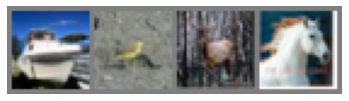

ship  bird  deer  horse


In [23]:
def unnormalize(img):
    return img / 2 + 0.5     # unnormalize

def imshow(img):
    """Function to show an image"""
    img = unnormalize(img)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
data_iter = iter(trainloader)
images, labels = data_iter.next()

plt.axis('off')
# show images
img_grid = torchvision.utils.make_grid(images)
imshow(img_grid)
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

### Model Definition

To simpify the model definition, we can use common components provided in the `torch.nn` library.

In [24]:
import torch.nn as nn
import torch.nn.functional as F

In this example, we define a custom convolutional neural network (CNN) by specifying a subclass of `nn.Module`. In the constructor, we define the components and hence also the parameters of our model. The `forward` method implements the forward pass in our net. Since the model is a subclass of `nn.Module`, the parameters are automatically tracked for the gradient computations.

In [25]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

first_par = next(net.parameters())
print(f"shape: {first_par.shape}")
print(f"requires_grad: {first_par.requires_grad}")

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
shape: torch.Size([6, 3, 5, 5])
requires_grad: True


### Training

Before we can start the training of our net, we must define the loss function and the optimization method. Fortunately, common variants are already implemented in PyTorch.

In [26]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

After we moved our net to the preferred device and set it in training mode, we can start the training. In each iteration, we execute the forward pass for a batch of training data, calculate the loss and the gradients, and finally conduct gradient descent with the optimizers's `step()` method. Notice that we reset the parameter gradients in each iteration with the optimizer's `zero_grad()` method so that they are not accumulated over the iterations.

In [27]:
# move the net and its parameters to the preferred device
net.to(device)

# set the net in training mode
net.train()

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}")
            running_loss = 0.0

print("Finished Training")

[1,  2000] loss: 2.185
[1,  4000] loss: 1.874
[1,  6000] loss: 1.705
[1,  8000] loss: 1.578
[1, 10000] loss: 1.527
[1, 12000] loss: 1.474
[2,  2000] loss: 1.399
[2,  4000] loss: 1.376
[2,  6000] loss: 1.338
[2,  8000] loss: 1.317
[2, 10000] loss: 1.288
[2, 12000] loss: 1.245
Finished Training


The parameters of a trained model can be stored in a local file. These parameters can then be loaded again from the file to initalize a new model.

In [28]:
PATH = "./cifar_net.pth"

# save the learned parameters
torch.save(net.state_dict(), PATH)

# create a new net initialized with the stored parameters
pretrained_net = Net().load_state_dict(torch.load(PATH))

### Evaluation

We evaluate our trained net with the test dataset. The predicted label of an image is the class with the highest output value of the corresponding neuron.

In [29]:
# set the net in evaluation mode
net.eval()

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


Let's have a look at the prediction accuracy for each class.

In [30]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 61.4 %
Accuracy for class: car   is 74.6 %
Accuracy for class: bird  is 22.9 %
Accuracy for class: cat   is 59.2 %
Accuracy for class: deer  is 50.5 %
Accuracy for class: dog   is 32.4 %
Accuracy for class: frog  is 67.0 %
Accuracy for class: horse is 66.9 %
Accuracy for class: ship  is 63.8 %
Accuracy for class: truck is 49.0 %


### TensorBoard

The results can also be visualized with `tensorboard`.

In [31]:
!pip install -q -U tensorboard

from torch.utils.tensorboard import SummaryWriter
import datetime

# Default log_dir argument is "runs" - but it's good to be specific
writer = SummaryWriter('runs/cifar10_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

TensorBoard can be displayed embedded in the notebook.

In [32]:
%load_ext tensorboard
# %reload_ext tensorboard

In [33]:
#%tensorboard --host localhost --logdir=runs
# if it doesn't work, try --bind_all instead of --host localhost
%tensorboard --bind_all --logdir=runs

# the tensorboard is also available at http://localhost:6006/

# tensorboard can be killed with:
# Windows: !taskkill /F /PID pid OR !taskkill /IM "tensorboard.exe" /F, and then: !del /q %TMP%\.tensorboard-info\*
# Linux/MacOS: !kill pid

For instance, we can add images to the TensorBoard.

In [34]:
# Write image data to TensorBoard log dir
writer.add_image('Four CIFAR10 Images', unnormalize(img_grid))
writer.flush()

Moreover, we can track the progress of the training by evaluating our model regularly with a validation dataset. The training loss and the validation loss are then plotted in the TensorBoard. By comparing these characteristics, we can detect overfitting and underfitting.

In [35]:
# it is okay here to use the test data also as validation data since we don't
# modify the model's hyperparameters dependent on the validation data.
validation_loader = testloader
print(len(validation_loader))

new_net = Net()
new_net.to(device)
new_net.train() # training mode

new_criterion = nn.CrossEntropyLoss()
new_optimizer = optim.SGD(new_net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # basic training loop
        inputs, labels = data[0].to(device), data[1].to(device)
        new_optimizer.zero_grad()
        outputs = new_net(inputs)
        loss = new_criterion(outputs, labels)
        loss.backward()
        new_optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # Every 1000 mini-batches...
            print('Batch {}'.format(i + 1))
            # Check against the validation set
            running_vloss = 0.0

            new_net.eval() # evaluation mode
            with torch.no_grad():
                for j, vdata in enumerate(validation_loader, 0):
                    vinputs, vlabels = vdata[0].to(device), vdata[1].to(device)
                    voutputs = new_net(vinputs)
                    vloss = new_criterion(voutputs, vlabels)
                    running_vloss += vloss.item()
            new_net.train() # training mode

            avg_loss = running_loss / 1000
            avg_vloss = running_vloss / len(validation_loader)

            # Log the running loss averaged per batch
            writer.add_scalars('Training vs. Validation Loss',
                            { 'Training' : avg_loss, 'Validation' : avg_vloss },
                            epoch * len(trainloader) + i)

            running_loss = 0.0
print('Finished Training')

writer.flush()

2500
Batch 1000
Batch 2000
Batch 3000
Batch 4000
Batch 5000
Batch 6000
Batch 7000
Batch 8000
Batch 9000
Batch 10000
Batch 11000
Batch 12000
Finished Training


TensorBoard can also illustrate the computational graph.

In [36]:
writer.add_graph(new_net, inputs)

### Overfitting and underfitting
Learning how to deal with overfitting is important. Although it is often possible to achieve high accuracy on the training set, what we really want is to develop models that generalize well to a testing set (or data they haven't seen before).

The opposite of overfitting is underfitting. Underfitting occurs when there is still room for improvement on the test data. This can happen for a number of reasons: 
* If the model is not powerful enough,
* is over-regularized, or 
* has simply not been trained long enough. 

This means the model has not learned the relevant patterns in the training data.

If you train for too long though, the model will start to overfit and learn patterns from the training data that don't generalize to the test data. We need to strike a balance. Understanding how to train for an appropriate number of epochs is a useful skill.

To prevent overfitting, the best solution is to use more complete training data. The dataset should cover the full range of inputs that the model is expected to handle. Additional data may only be useful if it covers new and interesting cases.

The simplest way to prevent overfitting is to start with a small model: A model with a small number of learnable parameters (which is determined by the number of layers and the number of units per layer). In deep learning, the number of learnable parameters in a model is often referred to as the model's "capacity".

Intuitively, a model with more parameters will have more "memorization capacity" and therefore will be able to easily learn a perfect dictionary-like mapping between training samples and their targets, a mapping without any generalization power, but this would be useless when making predictions on previously unseen data.

Always keep this in mind: deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

On the other hand, if the network has limited memorization resources, it will not be able to learn the mapping as easily. To minimize its loss, it will have to learn compressed representations that have more predictive power. At the same time, if you make your model too small, it will have difficulty fitting to the training data. There is a balance between "too much capacity" and "not enough capacity".

To find an appropriate model size, it's best to start with relatively few layers and parameters, then begin increasing the size of the layers or adding new layers until you see diminishing returns on the validation loss.